# **Estatística Descritiva e testes de hipóteses - House Price**

A estatística descritiva é o ramo da estatística que envolve a organização, sumarização e interpretação de dados. Ela descreve e analisa os dados através de medidas como média, mediana, moda, desvio padrão, entre outras. Seu objetivo principal é fornecer uma compreensão clara e concisa dos dados, facilitando sua interpretação e tomada de decisões.

## Análise preços de casas

**Importando as bibliotecas usadas**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats


sns.set_style("white")

%matplotlib inline
%config InlineBackend.figure_format='svg'

**Carregando dataset House Pricing**

In [3]:
df_house_pricing = pd.read_csv("datasets/house_price.csv")

In [4]:
df_house_pricing.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


### **Descrição dos atribultos do DataFrame**


<p>
       <ul>
              <li>
                      <strong>SalePrice:</strong> Preço de venda
              </li>
              <li>
                      <strong>OverallQual:</strong> Avalie o material geral e o acabamento da casa
              </li>
              <li>
                     <strong>OverallCond:</strong> Avalia a condição geral da casa
              </li>
              <li>
                     <strong>BedroomAbvGr:</strong> Quartos acima do nível (NÃO inclui quartos no subsolo)
              </li>
              <li>
                      <strong>TotRmsAbvGrd:</strong> Total de quartos acima da classe  (não inclui banheiros)
              </li>
              <li>
                    <strong>GrLivArea:</strong> Acima do nível (solo) da área de estar em pés quadrados
              </li>
              <li>
                     <strong>TotalBsmtSF:</strong> Total de pés quadrados da área do porão
              </li>
              <li>
                     <strong>YearBuilt:</strong> Data original de construção
              </li>
              <li>
                     <strong>MSZoning</strong> - Identifica a classificação geral de zoneamento da venda
                     <ul>
                            <li>
                                   <strong>A</strong>    Agriculture (Agricultura)
                             </li>
                             <li>
                                   <strong>C</strong>    Commercial (Comercial)
                             </li>
                             <li>
                                   <strong>FV</strong>    Floating Village Residential (Residencial Vila Flutuante)
                             </li> 
                             <li>
                                   <strong>I</strong>     Industrial (Industrial)
                             </li>
                             <li>
                                   <strong>RH</strong>    Residential High Density (Residencial Alta Densidade)
                             </li>
                             <li>
                                   <strong>RL</strong>    Residential Low Density (Residencial Baixa densidade)
                             </li>
                             <li>
                                    <strong>RP</strong>    Residential Low Density Park  (Parque residencial de baixa densidade)
                             </li>
                             <li>
                                     <strong>RM</strong>    Residential Medium Density  (Residencial Média Densidade)
                             </li>
                     </ul>
              </li>
              <li>
                     <strong>Utilities:</strong> Tipo de utilitários disponíveis
                     <ul>
                            <li>
                                   <strong>AllPub</strong>    All public Utilities (E,G,W,& S) (Todos os serviços públicos (E,G,W e S))
                             </li>
                             <li>
                                   <strong>NoSewr</strong>    Electricity, Gas, and Water (Septic Tank) (Eletricidade, Gás e Água (Fossa séptica))
                             </li>
                             <li>
                                   <strong>NoSeWa</strong>    Electricity and Gas Only (Apenas eletricidade e gás)
                             </li>
                             <li>
                                   <strong>ELO</strong>       Electricity only (Somente eletricidade)
                             </li>
                     </ul>
              </li>
              <li>
                     <strong>BldgType:</strong> Tipo de moradia
                     <ul>
                            <li>
                                   <strong>1Fam</strong>      Single-family Detached  (Desanexação unifamiliar)
                             </li>
                             <li>
                                   <strong>2FmCon</strong>    Two-family Conversion; originally built as one-family dwelling (Conversão de duas famílias; originalmente construído como residência unifamiliar)
                             </li>
                             <li>
                                    <strong>Duplx</strong>     Duplex (Dúplex)
                             </li>
                             <li>
                                   <strong>TwnhsE</strong>    Townhouse End Unit (Unidade final da moradia)
                             </li>
                             <li>
                                    <strong>TwnhsI</strong>    Townhouse Inside Unit (Townhouse dentro da unidade)
                             </li>
                     </ul>
              </li>
       </ul>
</p>




In [5]:
df_house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


Verificando se o dataframe possui valores nulos

In [6]:
df_house_pricing.isnull().sum()

Unnamed: 0      0
SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

Obtendo as medidas de tendência centrais mais usuais, Média, Mediana e Moda

In [7]:
mean = df_house_pricing["SalePrice"].mean()
median = df_house_pricing["SalePrice"].median()
mode = df_house_pricing["SalePrice"].mode()

print(f"\nMean: {mean:.2f}\nMedian: {median}\nMode: {mode}")


Mean: 180921.20
Median: 163000.0
Mode: 0    140000
Name: SalePrice, dtype: int64


Analisando os valores obtidos da média, mediana e moda, podemos concluir que a média possui seu valor maior do que o valor da mediana, isso dá evidencias de que a distribuição dos dados de presificação das casas é Assimétrica Negativa, ou seja, é possível que existam poucos casas com precificação alta que deslocam a média para longe da mediana tornando a distribuição assimétrica negativa.

Podemos observar essa informação de uma forma mais visual usando um boxplot

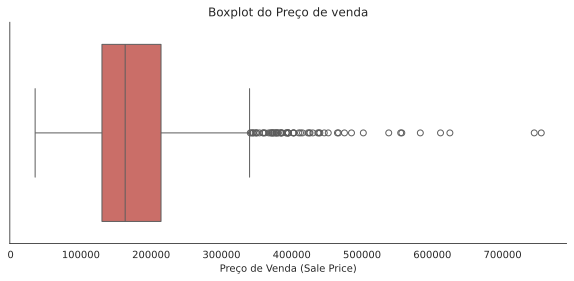

In [8]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_house_pricing.SalePrice,
            color=sns.color_palette("hls", 1).as_hex()[0])
plt.title("Boxplot do Preço de venda")
plt.xlabel("Preço de Venda (Sale Price)")
sns.despine()
plt.show()

In [9]:
df_house_pricing["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

A partir dos dados de tendência central e do gráfico boxplot podemos comprovar que existe outliers que influenciam na distribuição dos dados, como a média é sencível a outliers seu valor ficou distante da mediana. O boxplot permitiu observar os outliers de forma visual dando mais robustes a análise.

---

### **Análise dos preços das casas**

***Por que será que essas casas do percentil 75 até o valor máximo são tão mais caras do que o restante?***

Para responder isso, vamos voltar nas colunas que selecionamos

In [10]:
df_house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


## **Hipóteses**

Das variáveis **numéricas**, podemos pensar em algumas hipóteses:

1.   A média/mediana da qualidade do imóvel é superior para os apartamentos mais caros
2.   A média/mediana da quantidade de cômodos/quartos/área/banheiros é maior em apartamentos mais caros
3.   Os apartamentos mais caros são mais antigos

Das variáveis **categóricas**, podemos pensar em algumas hipóteses:

4.   Existe diferença de preço de acordo com sua localização (zona) 
5.   As utilidades (gás, água, etc) existentes na casa tem influência no preço
6.   O tipo de habitação influencia o preço (duplex, condomínio, etc)


***Agora, precisamos validar se essas hipóteses são verdadeiras ou não com dados***


### **Dados Numéricas** 

Resumo de medidas de tendências centrais

In [11]:
df_house_pricing.describe()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,180921.195890,6.099315,5.575342,2.866438,6.517808,1515.463699,1057.429452,1971.267808
std,421.610009,79442.502883,1.382997,1.112799,0.815778,1.625393,525.480383,438.705324,30.202904
min,0.000000,34900.000000,1.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1872.000000
25%,364.750000,129975.000000,5.000000,5.000000,2.000000,5.000000,1129.500000,795.750000,1954.000000
50%,729.500000,163000.000000,6.000000,5.000000,3.000000,6.000000,1464.000000,991.500000,1973.000000
75%,1094.250000,214000.000000,7.000000,6.000000,3.000000,7.000000,1776.750000,1298.250000,2000.000000
max,1459.000000,755000.000000,10.000000,9.000000,8.000000,14.000000,5642.000000,6110.000000,2010.000000


#### Criando uma nova coluna categórica contendo a informação de casas ***Caras*** e ***Baratas***

Para validarmos nossas hipóteses, vamos criar uma coluna que nos diga se a casa era "cara" ou se a casa era "barata" - sendo que o que definimos como "cara" são as casas acima do percentil 75 (214k) e como "baratas" as casas abaixo desse percentil 75.

In [12]:
df_house_pricing['categoria_preco'] = (
    np.where(df_house_pricing
             ['SalePrice']>214000, "cara", "barata"))
df_house_pricing


,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,categoria_preco
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,barata
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,barata
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,cara
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,barata
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,cara
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,barata
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,barata
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,cara
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,barata


Vamos agora começar a calcular as estatísticas de cada uma das categorias criadas

In [13]:
(df_house_pricing
 .groupby("categoria_preco")
 ["OverallQual"]
 .mean()
 .to_frame()
 .reset_index())

,categoria_preco,OverallQual
0,barata,5.588342
1,cara,7.649171


In [14]:

def boxplot_preco(coluna):
    dados = (df_house_pricing
            .groupby(["categoria_preco"])
            .agg({
                coluna: ["mean", "median"]
            }))
    print(f"\nMédia: {dados[coluna]['mean']}\n")
    print(f"Mediana: {dados[coluna]['median']}")

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_house_pricing,
                x="categoria_preco",
                y=coluna,
                hue="categoria_preco",
                palette=sns.color_palette("hls", 2))
    plt.xticks(rotation=90);
    plt.xlabel("Categoria Preço")
    plt.ylabel(coluna)
    sns.despine();
    plt.show()

**Boxplot da categoria de preço por OverallQual (Qualificação geral)**


Média: categoria_preco
barata    5.588342
cara      7.649171
Name: mean, dtype: float64

Mediana: categoria_preco
barata    6.0
cara      8.0
Name: median, dtype: float64


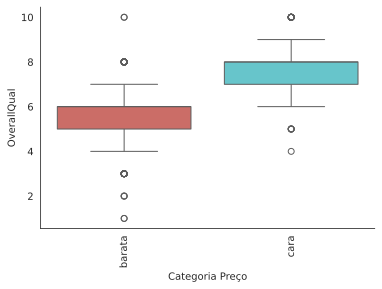

In [15]:
boxplot_preco("OverallQual")

Ao analisar os dados de média e mediana juntamente com os boxplots, podemos observar de forma geral que as casas mais caras possuem uma Qualidade Geral `(OverallQual)` melhor que as das casas baratas, no entanto quando observamos os boxplots é possivel ver que existe uma sobreposição entre o limite superior do boxplot das casas baratas com o limite inferior das casas caras, com isso não é possivel afirmar de forma certeira que a média são significativamente diferente entre as categorias, para isso, deve-se realizar teste de hipótese para comprovar essa diferença caso exista.


> Obs: Quando as médias entre as categorias estão relativamente distante entre si, é provável que o teste de hipótese tenha um resultado positivo no sentido de afirmar a diferença entre as médias, no entando, isso de verifica verdadeiro apenas quando se tem uma quantidade de dados relativamente grande, que é o caso da base de dados usada nessa análise.

**Boxplot da categoria de preço por OverallCond (Condição Geral)**


Média: categoria_preco
barata    5.631148
cara      5.406077
Name: mean, dtype: float64

Mediana: categoria_preco
barata    5.0
cara      5.0
Name: median, dtype: float64


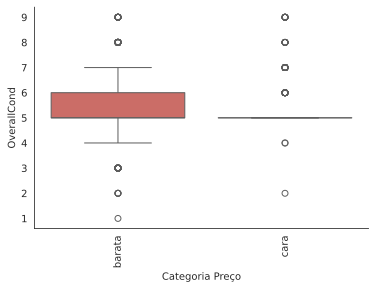

In [16]:
boxplot_preco("OverallCond")

Podemos observar que o boxplot das casas **caras** tem um comportamento fora do padrão de um boxplot, dessa forma podemos buscar evidências que nos permita tirar conclusões do porquê dessa característica fora do padão.

In [17]:
(df_house_pricing
 [df_house_pricing
  .categoria_preco == "cara"]
  [['categoria_preco', 'OverallCond']])

,categoria_preco,OverallCond
2,cara,5
4,cara,5
6,cara,5
11,cara,5
13,cara,5
...,...,...
1437,cara,5
1442,cara,5
1447,cara,5
1451,cara,5


In [18]:
(df_house_pricing
 [df_house_pricing
  ["categoria_preco"]=="cara"]["OverallCond"]
  .value_counts())

OverallCond
5    284
7     32
6     25
8      9
9      9
4      2
2      1
Name: count, dtype: int64

> A partir do resultado das duas células de código acima podemos constatar que os valores da amostra estão muito concetrados em $5$, isso pode ser uma coincidência ou as pessoas que realizaram o levantamento dos dados colocaram de forma arbitrária esse valor.

De qualquer forma esse atribulto da base de dados não é relevante para uma possivel inferência uma vez que a média e mediana das categorias são muito próximas.

**Boxplot da categoria de preço por BedroomAbvGr (Quartos acima do subsolo)**


Média: categoria_preco
barata    2.806922
cara      3.046961
Name: mean, dtype: float64

Mediana: categoria_preco
barata    3.0
cara      3.0
Name: median, dtype: float64


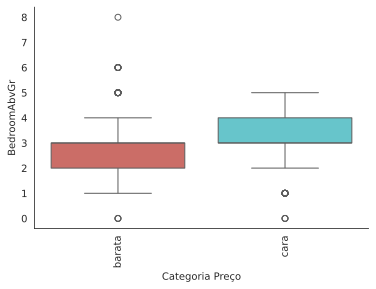

In [19]:
boxplot_preco("BedroomAbvGr")

Para o atribulto `BedroomAbvGr` (Quartos acima do nível (NÃO inclui quartos no subsolo)) podemos observar novamente que os boxplots possuem sobreposição, porém com uma maior media e mediana para as casas caras.

**Boxplot da categoria de preço por TotRmsAbvGrd (Total de quartos acima da classe)**


Média: categoria_preco
barata    6.122951
cara      7.715470
Name: mean, dtype: float64

Mediana: categoria_preco
barata    6.0
cara      8.0
Name: median, dtype: float64


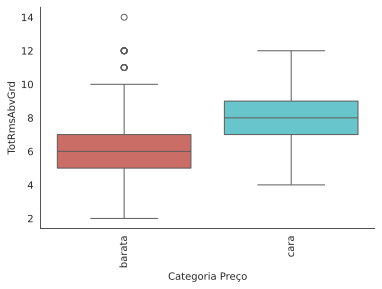

In [20]:
boxplot_preco("TotRmsAbvGrd")

Para o atribulto `TotRmsAbvGrd` (Total de quartos acima da classe) é observado que as medidas de tendência central possui uma diferença entre as categorias (barato, caro), porém novamente existe uma sobreposição, sendo necessário um teste de hipótese para que essa diferença seja realmente comprovada.

**Boxplot da categoria de preço por GrLivArea ()**


Média: categoria_preco
barata    1342.642077
cara      2039.657459
Name: mean, dtype: float64

Mediana: categoria_preco
barata    1308.5
cara      1956.0
Name: median, dtype: float64


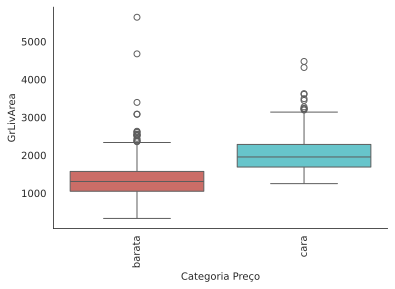

In [21]:
boxplot_preco("GrLivArea")

Para a área a tendência é que casas mais baratas possuam menor área de casas mais caras possuam uma área maior, no entanto deve-se realizar um teste de hipótese para afirmar essa suposição, já que novamente existe uma sobreposição entre os gráficos de boxplot.

**Boxplot da categoria de preço por TotalBsmtSF ()**


Média: categoria_preco
barata     936.475410
cara      1424.301105
Name: mean, dtype: float64

Mediana: categoria_preco
barata     912.0
cara      1452.5
Name: median, dtype: float64


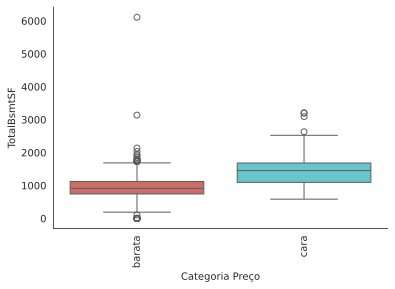

In [22]:
boxplot_preco("TotalBsmtSF")

Para o atribulto `TotalBsmtSF` (Total de pés quadrados da área do porão) vemos novamente que as medidas de tendência central são maiores para as casas caras, mas essa diferença deve ser validada através de teste de hipótese.

**Boxplot da categoria de preço por TotalBsmtSF ()**


Média: categoria_preco
barata    1964.303279
cara      1992.392265
Name: mean, dtype: float64

Mediana: categoria_preco
barata    1965.5
cara      2002.0
Name: median, dtype: float64


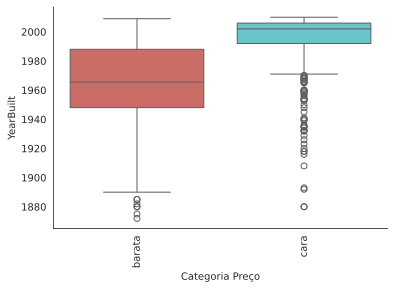

In [23]:
boxplot_preco("YearBuilt")

Para o atribulto `YearBuilt` não é possível discriminar as categorias por esse atribulto uma vez que existe uma sobreposição significativa entre eles.

___

### Correlação entre as variáveis e o preço do imóvel

A correlação é uma medida estatística que descreve o grau de relação entre duas variáveis. Ela avalia se existe uma relação entre essas variáveis e, caso exista, a direção e a força dessa relação. Em outras palavras, a correlação indica se as mudanças em uma variável estão associadas às mudanças na outra variável, e em que magnitude. Uma correlação positiva sugere que as variáveis tendem a se mover na mesma direção, enquanto uma correlação negativa indica que elas se movem em direções opostas. No entanto, é importante notar que correlação não implica causalidade; apenas porque duas variáveis estão correlacionadas, não significa necessariamente que uma causa a outra. Assim, a interpretação cuidadosa da correlação é essencial para evitar conclusões errôneas.

![](https://i0.wp.com/www.opuspesquisa.com/wp-content/uploads/2020/04/ct01.jpg?w=550&ssl=1)

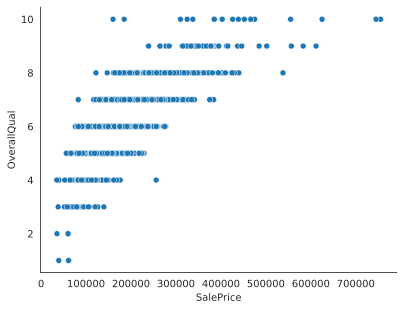

In [24]:
sns.scatterplot(data=df_house_pricing,
                x="SalePrice",
                y="OverallQual")
sns.despine()
plt.show()

Devido à natureza discreta do atributo `OverallQual`, é perceptível que os pontos se agrupam em linhas distintas. No entanto, à medida que o valor de `OverallQual` aumenta, é evidente uma tendência de aumento no preço das casas. Isso sugere uma correlação entre as variáveis, mas para quantificar essa relação, é necessário recorrer a diferentes medidas estatísticas, tais como o coeficiente de correlação de Pearson, o coeficiente de correlação de Spearman ou o coeficiente de correlação de Kendall. Essas medidas oferecem uma compreensão mais precisa e robusta da associação entre os atributos em questão, permitindo uma análise mais aprofundada da relação entre a qualidade geral das casas e seus preços.

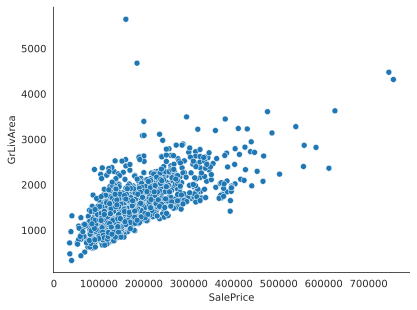

In [25]:
sns.scatterplot(data=df_house_pricing,
                x="SalePrice",
                y="GrLivArea")
sns.despine()
plt.show()

Para o atributo `GrLivArea` (Área construída), é evidente uma correlação positiva, indicando que à medida que uma variável aumenta, a outra também aumenta. Esse tipo de correlação sugere uma relação direta entre a área construída e outra variável em questão.

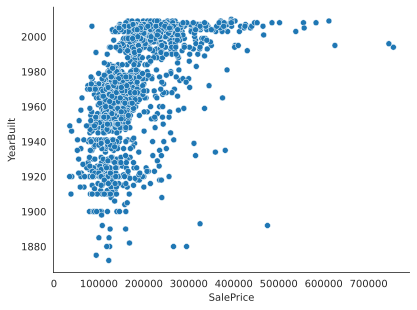

In [26]:
sns.scatterplot(data=df_house_pricing,
                x="SalePrice",
                y="YearBuilt")
sns.despine()
plt.show()

A correlação entre o ano de construção e o preço não é significativamente forte, sugerindo que o atributo `YearBuilt` pode não ser uma variável decisiva para discriminar entre casas caras e baratas. Isso indica que, embora o ano de construção possa ter influência sobre o preço, outros fatores podem desempenhar um papel mais preponderante na determinação do valor de uma propriedade.

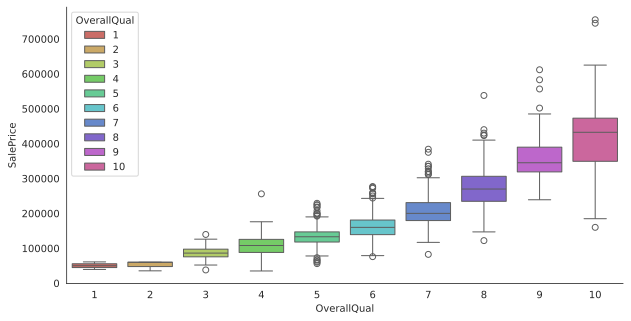

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_house_pricing,
                x="OverallQual",
                y="SalePrice",
                hue="OverallQual",
                palette=sns.color_palette("hls", 10))
sns.despine()
plt.show()

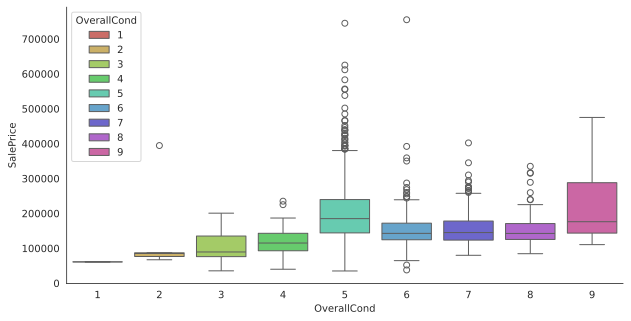

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_house_pricing,
                x="OverallCond",
                y="SalePrice",
                hue="OverallCond",
                palette=sns.color_palette("hls", 9))
sns.despine()
plt.show()

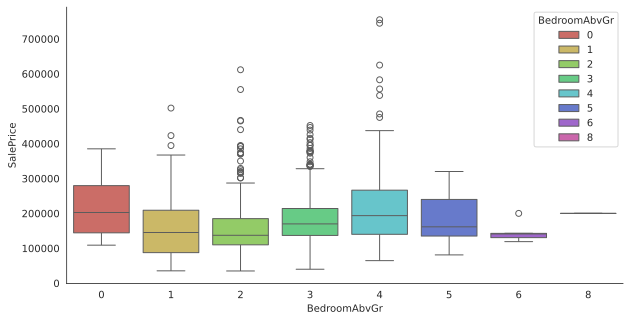

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_house_pricing,
                x="BedroomAbvGr",
                y="SalePrice",
                hue="BedroomAbvGr",
                palette=sns.color_palette("hls", 8))
sns.despine()
plt.show()

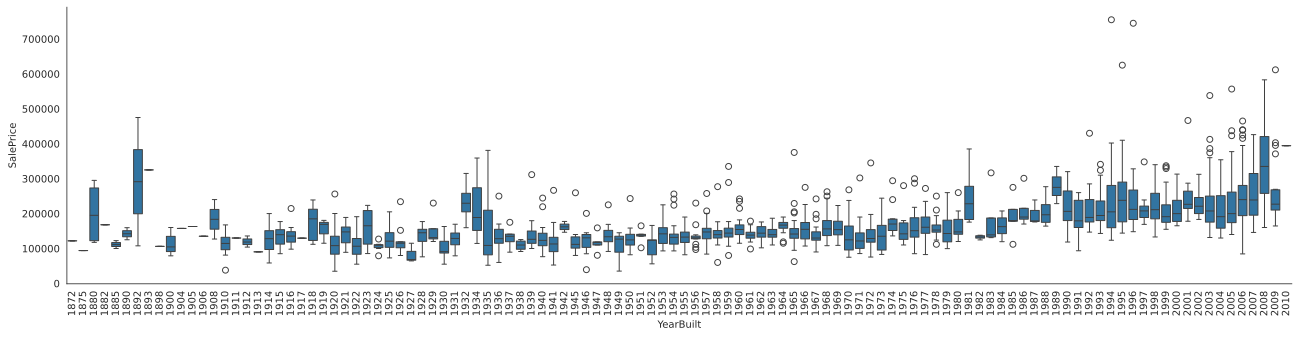

In [30]:
plt.figure(figsize=(22, 5))
sns.boxplot(data=df_house_pricing,
                x="YearBuilt",
                y="SalePrice")
plt.xticks(rotation=90)
sns.despine()
plt.show()

### **Dispersão**

Estamos agora interessandos em entender o comportamento perante a distribuição de features e/ou target numéricos. É importante responder, por exemplo, se:

1) A distribuição é normal? Essa pergunta deve ser feita pois diversas outras estatísticas que vocês verão nos próximos módulos são aplicadas *apenas* em distribuições normais (DISTRIBUIÇÕES PARAMETRICAS)

2) Qual é o desvio padrão da distribuição? Será que os dados variam muito?

3) Qual seria a curtose dessa distribuição? Com isso, conseguiremos entender se existem mais ou menos dados concentrados na cauda

4) Se não for normal, qual é a skew dessa distribuição? Com isso, podemos entender se a cauda é desviada mais pra direita ou esqueda



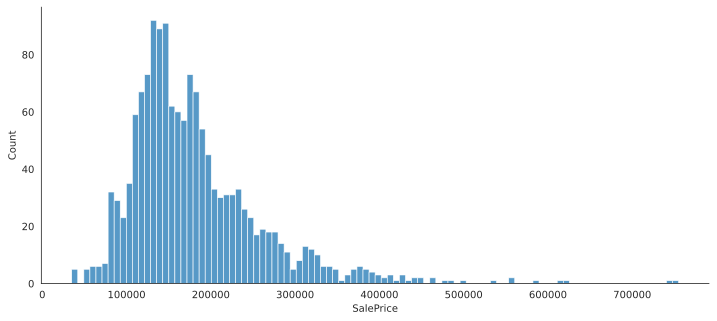

In [31]:
plt.figure(figsize=(12, 5))
sns.histplot(df_house_pricing["SalePrice"], bins=100)
sns.despine()
plt.show()

Analisando o histograma fornecido, é evidente que os dados exibem uma distribuição assimétrica, caracterizada por uma cauda longa à direita. Essa observação sugere que a distribuição não segue uma distribuição normal. Portanto, é plausível inferir a presença de valores atípicos (outliers) no conjunto de dados.

Para obter o desvio padrão, pode-se usar a seguinte linha de código.

In [32]:
desvio_padrao = df_house_pricing["SalePrice"].std()
print(f"\nDesvio Padrão: {desvio_padrao:.2f}")
print(f"Média: {mean:.2f}")
print(f"Mediana: {median:.2f}")


Desvio Padrão: 79442.50
Média: 180921.20
Mediana: 163000.00


Ao comparar o desvio padrão com a média e a mediana, é possível concluir que o desvio padrão é consideravelmente elevado, verificando o coeficiente de variação.

In [33]:
coef_var = (desvio_padrao/df_house_pricing["SalePrice"].mean())*100
print(f"\nCoeficiente de Variação (CV): {coef_var:.2f}%")


Coeficiente de Variação (CV): 43.91%


Com isso, podemos observar que o desvio padrão representa 43,91% do valor da média.

Uma interpretação intuitiva para o desvio padrão é entendê-lo com um uma medida de erro caso aproximarmos (ou estimarmos) todos os valores da série dados pela sua média. Se nos basearmos somente pela média desses dados, entendendo que o desvio padrão é bastante alto, corremos o risco de interpretar mal esse dado. Daí a importancia das medidas que vimos até agora: mediana, moda e o próprio desvio padrão.

Obtendo o valor da assimetria

In [34]:
from scipy.stats import skew
skew_calc = skew(df_house_pricing["SalePrice"])
print(f"\nAssimetria: {skew_calc:.2f}")


Assimetria: 1.88


A Assimetria é possitiva e maior que 1, isso nos mostra que os dados possuem uma cauda longa a direita e com uma assimetria significativa, pois o valor é maior que 1.

> ***Usa-se as métricas para facilitar a análise de base de dados com muitas colunas, isso agiliza o processo de análise, além disso, ter valores quantitativos relacionados as métricas é uma forma robusta de validar as hipóteses***

## **Hipóteses**

Das variáveis **numéricas**, podemos pensar em algumas hipóteses:

1.   A média/mediana da qualidade do imóvel é superior para os apartamentos mais caros
2.   A média/mediana da quantidade de cômodos/quartos/área/banheiros é maior em apartamentos mais caros
3.   Os apartamentos mais caros são mais antigos

Das variáveis **categóricas**, podemos pensar em algumas hipóteses:

4.   Existe diferença de preço de acordo com sua localização (zona) 
5.   As utilidades (gás, água, etc) existentes na casa tem influência no preço
6.   O tipo de habitação influencia o preço (duplex, condomínio, etc)


***Agora, precisamos validar se essas hipóteses são verdadeiras ou não com dados***

## **Realizando os Testes de Hipóteses**

##### ***1. A média/mediana da qualidade do imóvel é superior para os apartamentos mais caros***

> H0: $\mu_1 = \mu_2$\
> Ha: $\mu_1 \neq \mu_2$

vamos considerar o nível de significância igual a 5% ou 0,05.

In [35]:
overallqual_caras = (df_house_pricing
                    [df_house_pricing
                     ["categoria_preco"] == "cara"]
                    .OverallQual)
overallqual_baratas = (df_house_pricing
                      [df_house_pricing
                      ["categoria_preco"] == "barata"]
                      .OverallQual)

Verificando se as variâncias são iguais usando o teste `Bartlett`.

In [41]:
stat, p_valor = stats.bartlett(overallqual_caras, overallqual_baratas)

# Avaliando o p-valor
alpha = 0.05
if p_valor > alpha:
    print("\nAs variâncias são iguais (não podemos rejeitar a hipótese nula)")
    print(f"p-valor maior que alpha: {p_valor} > {alpha}")
else:
    print("As variâncias são diferentes (rejeitamos a hipótese nula)")
    print(f"p-valor menor que alpha: {p_valor} < {alpha}")


As variâncias são iguais (não podemos rejeitar a hipótese nula)
p-valor maior que alpha: 0.13475617979475457 > 0.05


Para verificar se as médias de duas amostras são diferentes ou iguais, você pode usar o teste `t de Student` para duas amostras independentes.

In [40]:
stat, p_valor = stats.ttest_ind(overallqual_caras, overallqual_baratas, equal_var=True)

# Avaliando o p-valor
alpha = 0.05
if p_valor > alpha:
    print("As médias das duas amostras são iguais (não rejeitamos a hipótese nula)")
    print(f"p-valor maior que alpha: {p_valor} > {alpha}")
else:
    print("As médias das duas amostras são diferentes (rejeitamos a hipótese nula)")
    print(f"p-valor menor que alpha: {p_valor} < {alpha}")

As médias das duas amostras são diferentes (rejeitamos a hipótese nula)
p-valor menor que alpha: 1.351855855595365e-171 < 0.05


Um teste não paramétrico comumente usado para comparar as médias de duas amostras independentes de dados discretos é o teste de `Mann-Whitney U`, também conhecido como teste `U de Mann-Whitney` ou teste de `Wilcoxon-Mann-Whitney`. Este teste é uma alternativa não paramétrica ao teste `t de Student` e é adequado para dados que não seguem uma distribuição normal ou quando a homogeneidade de variâncias não é atendida.

In [39]:
# Realizando o teste de Mann-Whitney U
stat, p_valor = stats.mannwhitneyu(overallqual_caras, overallqual_baratas)

# Avaliando o p-valor
alpha = 0.05
if p_valor > alpha:
    print("\nAs médias das duas amostras são iguais (não rejeitamos a hipótese nula)")
    print(f"p-valor maior que alpha: {p_valor} > {alpha}")
else:
    print("\nAs médias das duas amostras são diferentes (rejeitamos a hipótese nula)")
    print(f"p-valor menor que alpha: {p_valor} < {alpha}")


As médias das duas amostras são diferentes (rejeitamos a hipótese nula)
p-valor menor que alpha: 2.7304279606497642e-130 < 0.05


Calculando o intervalo de confiança das casas caras e baratas

In [59]:
def calc_interval_conf(dado):
    alpha=0.05
    n = len(dado)
    mean = np.mean(dado)
    se = stats.sem(dado)
    df = n - 1
    int_conf = stats.t.interval(1-alpha, df, loc=mean, scale=se)
    return mean, int_conf

mean_baratas, int_conf_baratas = calc_interval_conf(overallqual_baratas)
mean_caras, int_conf_caras = calc_interval_conf(overallqual_caras)

print(f"\nMédia casas baratas: {mean_baratas:.2f}")
print(f"Intervalo de confiança casas baratas:\
[{int_conf_baratas[0]:.2f} {int_conf_baratas[1]:.2f}]")


print(f"\nMédia casas caras: {mean_caras:.2f}")
print(f"Intervalo de confiança casas caras:\
[{int_conf_caras[0]:.2f}  {int_conf_caras[1]:.2f}]")


Média casas baratas: 5.59
Intervalo de confiança casas baratas:[5.52 5.65]

Média casas caras: 7.65
Intervalo de confiança casas caras:[7.55  7.75]
